## Distribution and Probability in Statistics

### Probability
We already know, what probability is and how it is calculated. But for clarity and sequence, the definition should be: <br>
```Probability is a measure of the likelihood that a particular event will occur. It's quantified as a number between 0 and 1, where 0 indicates impossibility, and 1 indicates certainty.```<br>
    **Probability answers questions about random events and uncertainty**
<br><br>
### Distrubution
A distribution in statistics is a function that describes the probabilities or the frequencies of different possible outcomes in a dataset.<br>
```Distribution shows which values are common and uncommon, describes how values are distributed for a field or dataset.```<br>
**It shows how data points are spread across a range of values, giving insights into data behavior and patterns.**<br><br>
A distribution illustrates:<br>
**1. Data Central Tendency:** Where most values in the data lie (*mean, median*).<br>
**2. Spread/Dispersion:** How much values vary from the central point (*variance, standard deviation*).<br>
**3. Shape of Data:** Indicates symmetry, skewness, and kurtosis, showing patterns like peaks or tails.<br><br>

# Types of Distribution

### 1. Normal Distribution (Gaussian)
**Shape:** Symmetrical, bell-shaped curve centered around the mean.<br>
**Key Traits:** Mean, median, and mode are equal; 68% of data falls within 1 standard deviation of the mean, 95% within 2.<br>
**Uses:** Common in nature and human traits (e.g., height, test scores); many machine learning algorithms assume normality.<br><br>

### 2. Binomial Distribution
**Shape:** Depends on probability *`𝑝`*; can be skewed or symmetrical.<br>
**Key Traits:** Models binary (success/failure) outcomes over a fixed number of trials, with a constant probability of success.<br>
**Uses:** For events like coin tosses, product quality tests, or customer churn rates.<br><br>

### 3. Poisson Distribution
**Shape:** Right-skewed, especially for small mean values.<br>
**Key Traits:** Models the number of events occurring in a fixed interval of time or space, given a constant mean rate.<br>
**Uses:** For rare events, such as calls to a call center per hour or website hits per minute.<br><br>

### 4. Exponential Distribution
**Shape:** Right-skewed curve.<br>
**Key Traits:** Describes the time between events in a Poisson process (e.g., waiting times).<br>
**Uses:** For processes like the time until system failure or customer arrivals.<br><br>

### 5. Uniform Distribution
**Shape:** Constant (flat) probability across all values.<br>
**Key Traits:** All outcomes in the range are equally likely.<br>
**Uses:** Simple random sampling, lotteries, and games where each outcome has an equal chance.<br><br>
### 6. Bernoulli Distribution
**Shape:** Two possible outcomes, one for success and one for failure.<br>
**Key Traits:** Models a single binary trial (success/failure) with probability *𝑝* for success.<br>
**Uses:** Foundation for the Binomial distribution; used in classification problems.<br><br>

### 7. Chi-Square Distribution
**Shape:** Right-skewed; skewness decreases with larger degrees of freedom.<br>
**Key Traits:** Arises from the sum of the squares of independent standard normal variables.<br>
**Uses:** In hypothesis testing and confidence intervals, especially in variance and goodness-of-fit tests.<br><br>

### 8. Beta Distribution
**Shape:** Flexible shape, depending on parameters *𝛼* and *𝛽*.<br>
**Key Traits:** Used for probabilities and proportions, defined over the interval [0, 1].<br>
**Uses:** Commonly used in Bayesian statistics for modeling beliefs about probabilities.<br>

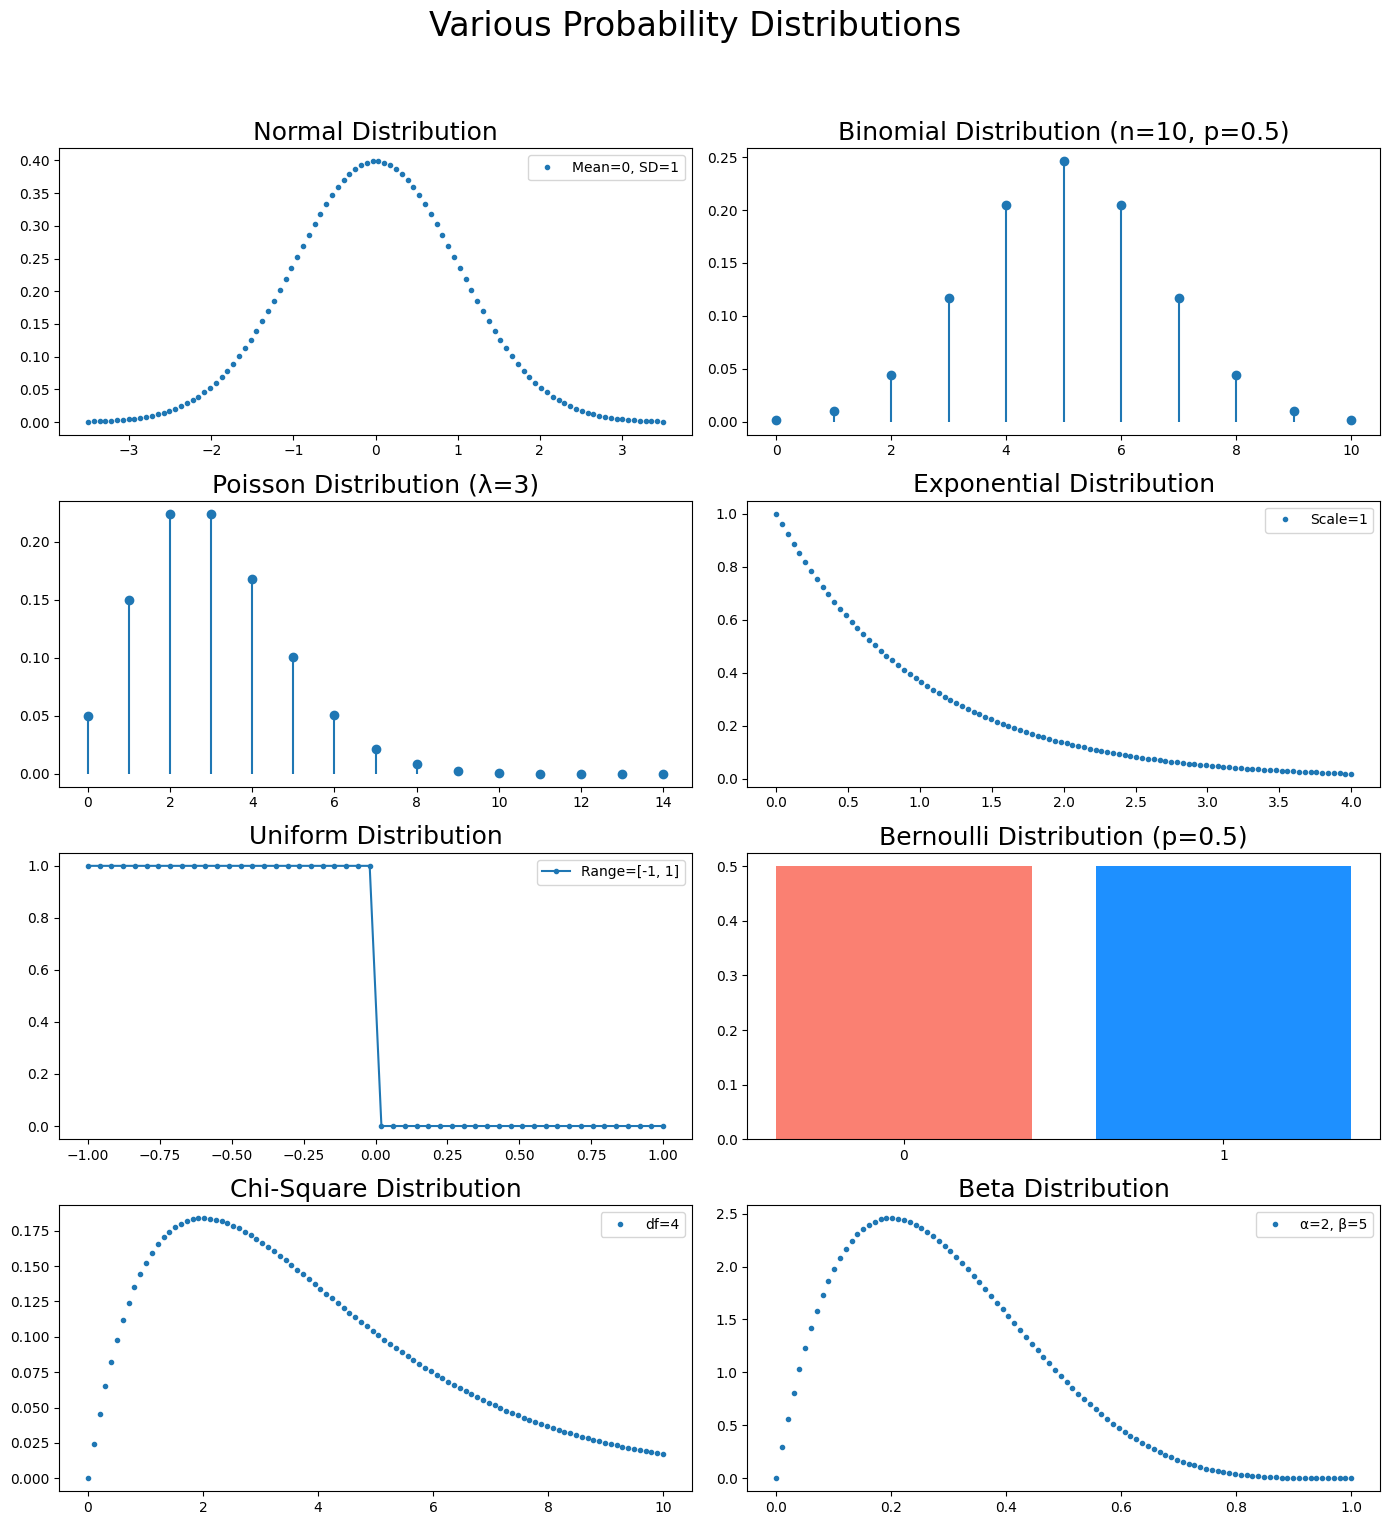

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson, expon, uniform, bernoulli, chi2, beta

# Set up the figure for subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
fig.suptitle("Various Probability Distributions", fontsize=24)

# 1. Normal Distribution
x = np.linspace(-3.5, 3.5, 100)
axes[0, 0].plot(x, norm.pdf(x, 0, 1), "." , label="Mean=0, SD=1")
axes[0, 0].set_title("Normal Distribution", fontsize=18)
axes[0, 0].legend()

# 2. Binomial Distribution
n, p = 10, 0.5
x = np.arange(0, n+1)
axes[0, 1].stem(x, binom.pmf(x, n, p), basefmt=" ")
axes[0, 1].set_title("Binomial Distribution (n=10, p=0.5)", fontsize=18)

# 3. Poisson Distribution
mu = 3
x = np.arange(0, 15)
axes[1, 0].stem(x, poisson.pmf(x, mu), basefmt=" ")
axes[1, 0].set_title("Poisson Distribution (λ=3)", fontsize=18)

# 4. Exponential Distribution
x = np.linspace(0, 4, 100)
axes[1, 1].plot(x, expon.pdf(x, scale=1), "." , label="Scale=1")
axes[1, 1].set_title("Exponential Distribution", fontsize=18)
axes[1, 1].legend()

# 5. Uniform Distribution
x = np.linspace(-1, 1, 50)
axes[2, 0].plot(x, uniform.pdf(x, loc=-1, scale=1), ".-" , label="Range=[-1, 1]")
axes[2, 0].set_title("Uniform Distribution", fontsize=18)
axes[2, 0].legend()

# 6. Bernoulli Distribution
p = 0.5
x = [0, 1]
axes[2, 1].bar(x, bernoulli.pmf(x, p), color=('salmon','dodgerblue'))
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_title("Bernoulli Distribution (p=0.5)", fontsize=18)

# 7. Chi-Square Distribution
df = 4
x = np.linspace(0, 10, 100)
axes[3, 0].plot(x, chi2.pdf(x, df), "." , label="df=4")
axes[3, 0].set_title("Chi-Square Distribution", fontsize=18)
axes[3, 0].legend()

# 8. Beta Distribution
a, b = 2, 5
x = np.linspace(0, 1, 100)
axes[3, 1].plot(x, beta.pdf(x, a, b), "." , label="α=2, β=5")
axes[3, 1].set_title("Beta Distribution", fontsize=18)
axes[3, 1].legend()

# Adjust layout and show plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

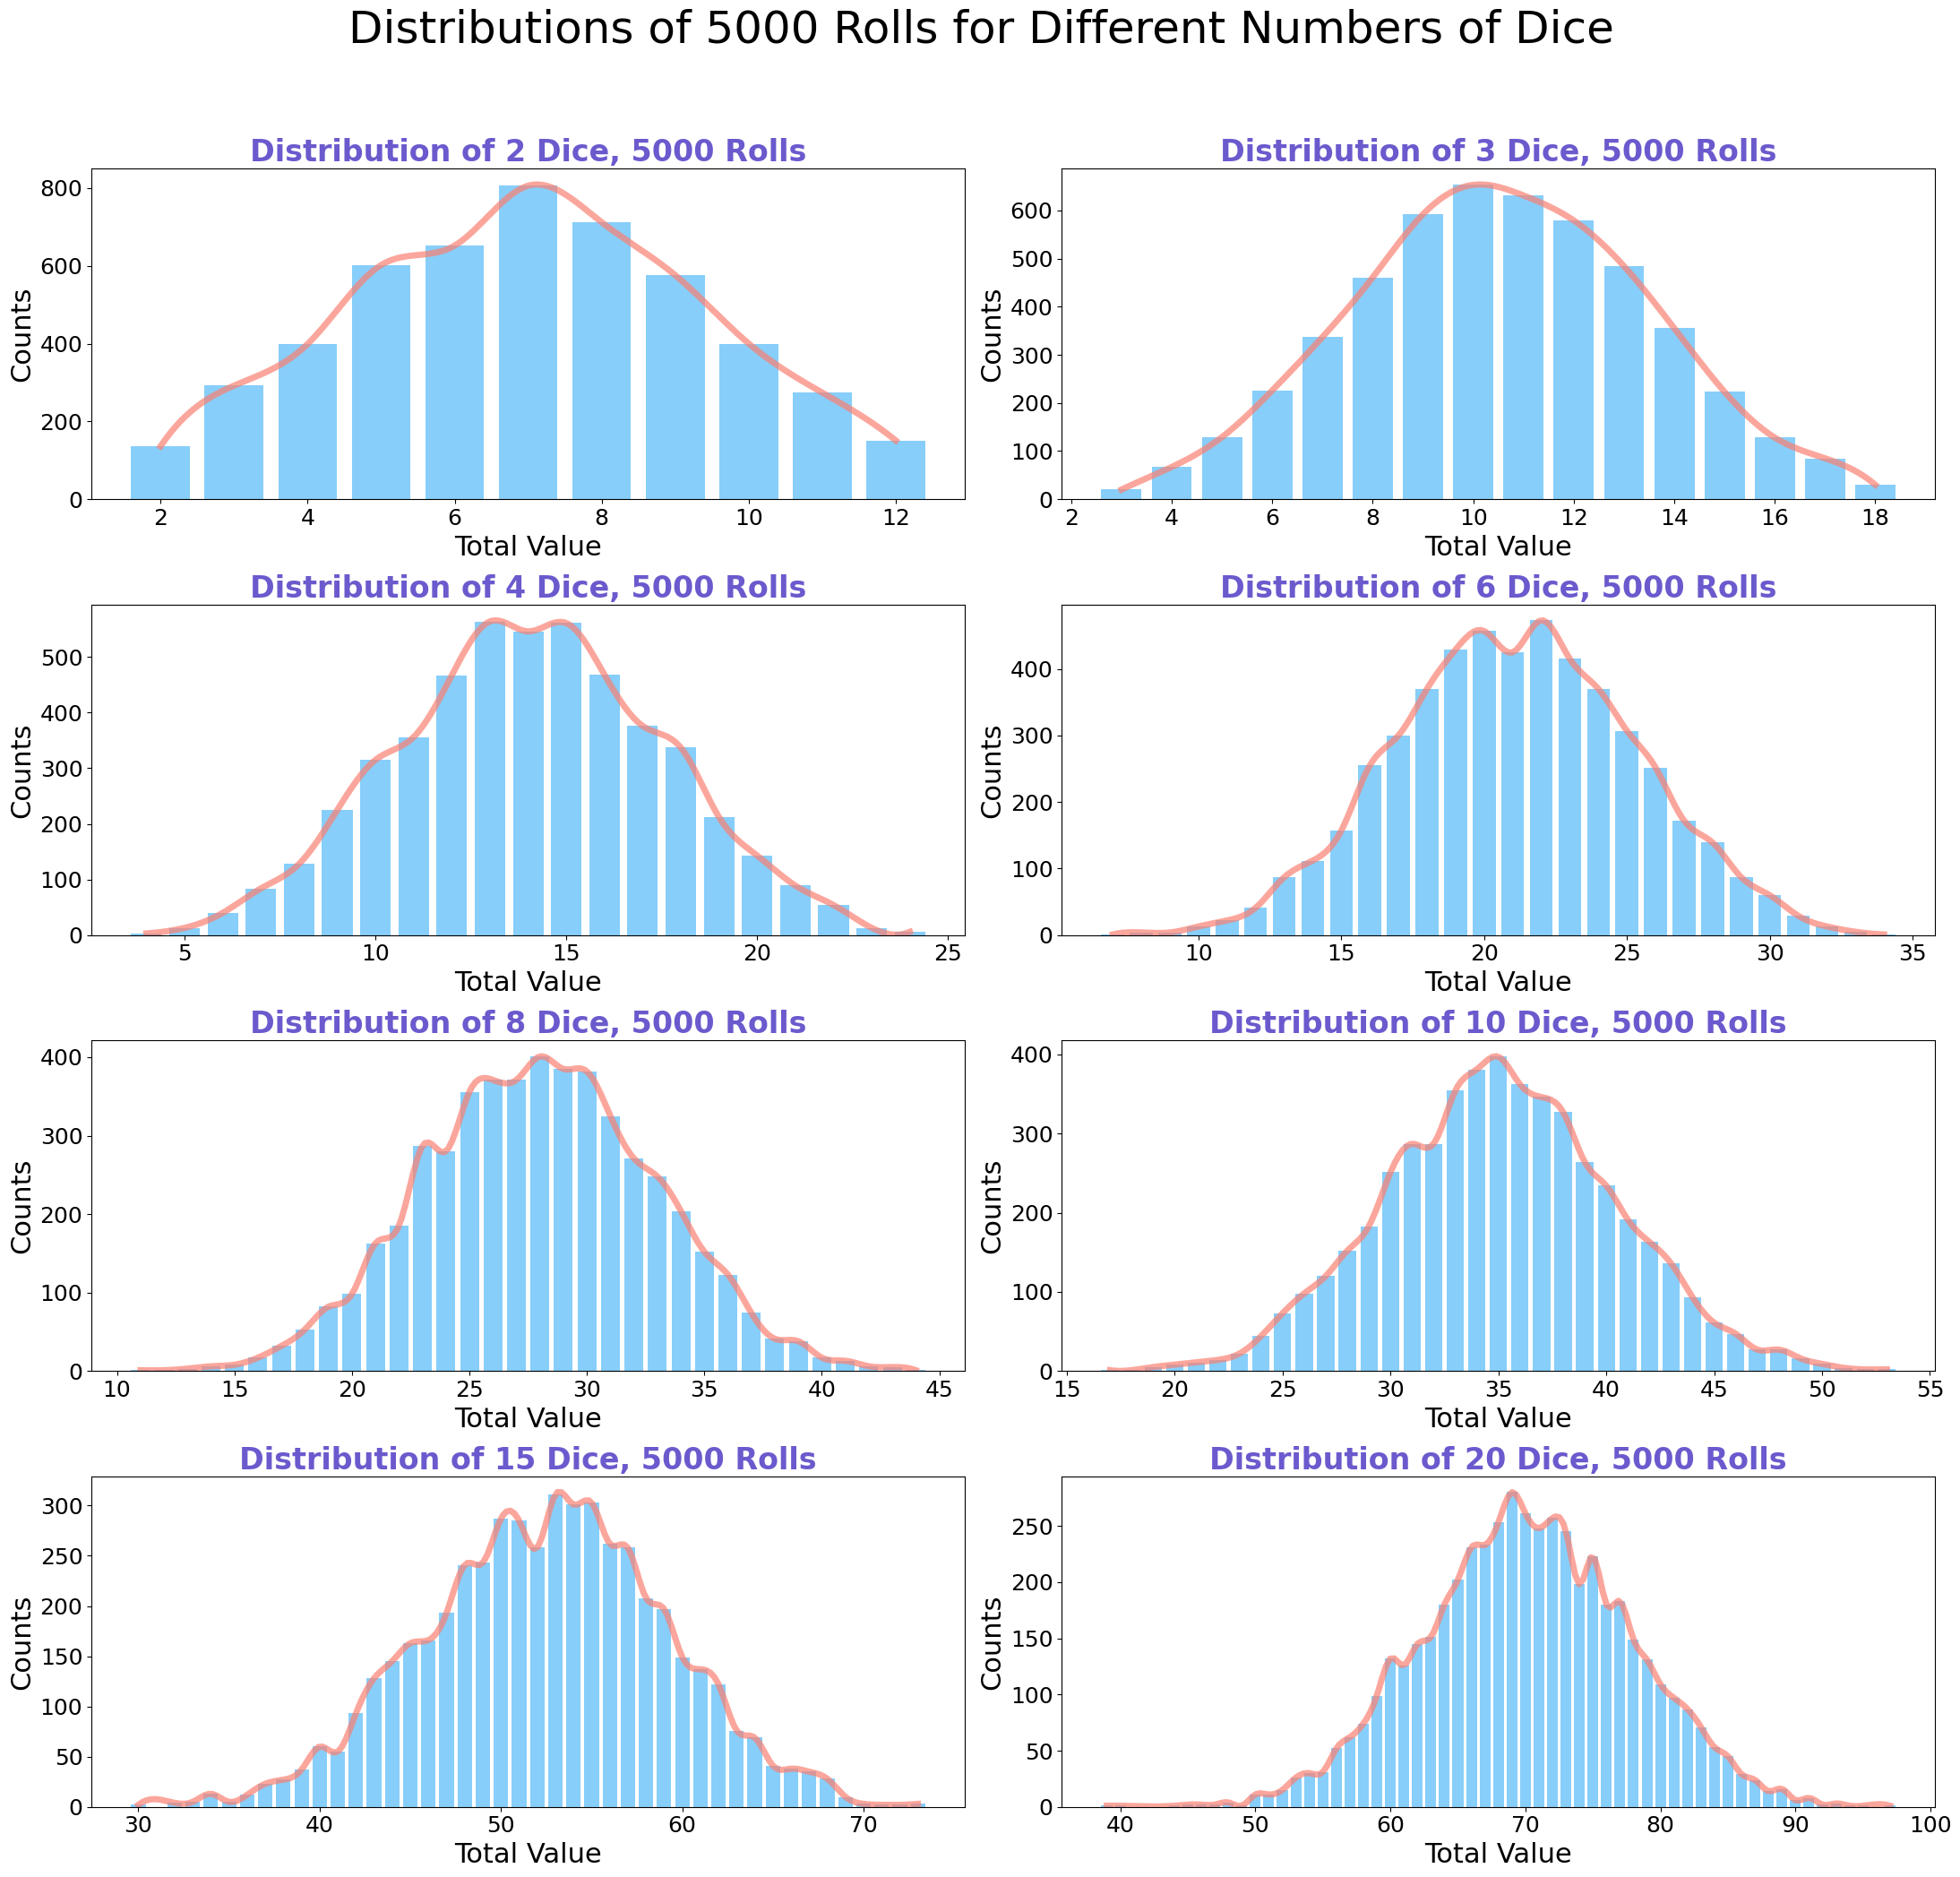

In [185]:
import matplotlib.pyplot as plt
from collections import Counter
from random import randint
from scipy.interpolate import make_interp_spline
import numpy as np

# Define the number of dice for each distribution
dices = [2, 3, 4, 6, 8, 10, 15, 20]
dist_list = [[] for _ in range(len(dices))]
rolls = 5000

# Generate distributions for each dice count in the list
for i, num_dice in enumerate(dices):
    for throw in range(rolls):
        total = sum(randint(1, 6) for _ in range(num_dice))  # Sum of 'num_dice' dice rolls
        dist_list[i].append(total)

# Set up the 4x2 subplot
fig, axes = plt.subplots(4, 2, figsize=(22, 22))
fig.suptitle(f"Distributions of {rolls} Rolls for Different Numbers of Dice", fontsize=36)

# Plot each distribution
for i, dist in enumerate(dist_list):
    counts = Counter(dist)
    x_values = list(counts.keys())
    y_counts = list(counts.values())
    
    # Sort x_values and y_counts by x_values
    x_values, y_counts = zip(*sorted(zip(x_values, y_counts)))
    
    # Get subplot row and column index
    row, col = divmod(i, 2)
    axes[row, col].bar(x_values, y_counts, color='lightskyblue')
    axes[row, col].set_title(f"Distribution of {dices[i]} Dice, {rolls} Rolls",
                             fontsize=24, weight='bold', color='slateblue')
    axes[row, col].set_xlabel('Total Value', fontsize=22)
    axes[row, col].set_ylabel('Counts', fontsize=22)
    # Increase font size for tick labels
    axes[row, col].tick_params(axis='both', labelsize=18)

    # Generate smooth line using interpolation for the curve
    x_smooth = np.linspace(min(x_values), max(x_values), 200)
    spline = make_interp_spline(x_values, y_counts, k=3)  # Cubic spline
    y_smooth = spline(x_smooth)

    # Plot the smooth curve
    axes[row, col].plot(x_smooth, y_smooth, color='salmon', linewidth=5, alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

[5, 5, 5, 5]